In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [3]:
#Load Dataset
df1=pd.read_csv("employee_promotion.csv")

In [4]:
df2=pd.read_csv("hr_employee_churn_data.csv")

In [5]:
df2 = df2.rename(columns={'empid': 'employee_id'})

# Save the modified dataset to a new CSV file
df2.to_csv('modified_dataset.csv', index=False)

In [6]:
df3=pd.read_csv("modified_dataset.csv")

In [7]:

# First, merge the two dataframes
merged_df = pd.merge(df1, df3[['employee_id', 'average_montly_hours']], on='employee_id')
import random


# Set the range of values for the updated "average_montly_hours" column
min_val_0 = 120
max_val_0 = 230
min_val_1 = 230
max_val_1 = 310

# Get the length of the data rows that have is_promoted = 0 or 1
n_0 = len(merged_df[merged_df['is_promoted'] == 0])
n_1 = len(merged_df[merged_df['is_promoted'] == 1])

# Calculate the number of rows to update for is_promoted = 0
update_count_0 = int(n_0 * 0.6)

# Get the indices of the rows to update for is_promoted = 0
update_indices_0 = random.sample(list(merged_df[merged_df['is_promoted'] == 0].index), update_count_0)

# Update the "average_montly_hours" column for the selected rows with is_promoted = 0
merged_df.loc[update_indices_0, 'average_montly_hours'] = [random.randint(min_val_0, max_val_0) for i in range(update_count_0)]

# Calculate the number of rows to update for is_promoted = 1
update_count_1 = int(n_1 * 0.6)

# Get the indices of the rows to update for is_promoted = 1
update_indices_1 = random.sample(list(merged_df[merged_df['is_promoted'] == 1].index), update_count_1)

# Update the "average_montly_hours" column for the selected rows with is_promoted = 1
merged_df.loc[update_indices_1, 'average_montly_hours'] = [random.randint(min_val_1, max_val_1) for i in range(update_count_1)]
merged_df.to_csv('modifiedHR.csv', index=False)

In [8]:
data=pd.read_csv("modifiedHR.csv")

In [9]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,average_montly_hours
0,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,197
1,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,124
2,7152,Technology,region_2,Bachelor's,m,other,1,38,3.0,5,0,77.0,0,237
3,9403,Sales & Marketing,region_31,Bachelor's,m,other,1,34,1.0,4,0,51.0,0,161
4,12067,Procurement,region_14,Bachelor's,m,other,1,35,3.0,7,0,75.0,0,122


In [10]:
print("Number of Rows in dataset:", data.shape[0])

Number of Rows in dataset: 10462


In [11]:
print("Number of Rows in dataset:", data.shape[0])
print("Number of Columns in dataset:", data.shape[1])
print("Columns in dataset:", data.columns)
print("Number of Entries :", data.size)
print("Datatypes in dataset :", data.dtypes)

Number of Rows in dataset: 10462
Number of Columns in dataset: 14
Columns in dataset: Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted',
       'average_montly_hours'],
      dtype='object')
Number of Entries : 146468
Datatypes in dataset : employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
average_montly_hours      int64
dtype: object


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           10462 non-null  int64  
 1   department            10462 non-null  object 
 2   region                10462 non-null  object 
 3   education             10020 non-null  object 
 4   gender                10462 non-null  object 
 5   recruitment_channel   10462 non-null  object 
 6   no_of_trainings       10462 non-null  int64  
 7   age                   10462 non-null  int64  
 8   previous_year_rating  9707 non-null   float64
 9   length_of_service     10462 non-null  int64  
 10  awards_won            10462 non-null  int64  
 11  avg_training_score    9966 non-null   float64
 12  is_promoted           10462 non-null  int64  
 13  average_montly_hours  10462 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


In [13]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,average_montly_hours
count,10462.000000,10462.000000,10462.000000,9707.000000,10462.000000,10462.000000,9966.000000,10462.000000,10462.000000
mean,7503.834066,1.253011,34.812177,3.323272,5.877175,0.022175,63.696267,0.086121,191.079144
std,4341.953454,0.618462,7.725540,1.270274,4.244681,0.147261,13.550173,0.280556,45.795941
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,40.000000,0.000000,96.000000
25%,3741.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000,153.000000
50%,7482.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000,187.000000
75%,11267.750000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000,223.000000
max,14999.000000,10.000000,60.000000,5.000000,33.000000,1.000000,99.000000,1.000000,310.000000


In [14]:
#Null values count
data.isnull().sum()

employee_id               0
department                0
region                    0
education               442
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    755
length_of_service         0
awards_won                0
avg_training_score      496
is_promoted               0
average_montly_hours      0
dtype: int64

#### Education, previous_year_rating, and avg_training_score contain null values

In [15]:
data.isnull().sum().sum()/len(data)

0.16182374307015868

#### 16% null values is present in the data set

In [16]:
data['previous_year_rating'].fillna(value=0,inplace=True)
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [17]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
average_montly_hours    0
dtype: int64

In [18]:
#Duplicate values count
data.duplicated().sum()

0

In [19]:
data=data.drop_duplicates()

In [20]:
data[data.columns].nunique()

employee_id             10462
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        6
length_of_service          33
awards_won                  2
avg_training_score         58
is_promoted                 2
average_montly_hours      215
dtype: int64

In [21]:
data['department'].value_counts()

Sales & Marketing    3267
Operations           2189
Procurement          1336
Technology           1332
Analytics            1062
Finance               444
HR                    437
Legal                 203
R&D                   192
Name: department, dtype: int64

In [22]:
data['region'].value_counts()

region_2     2329
region_22    1198
region_7      953
region_13     521
region_15     506
region_26     444
region_31     387
region_27     319
region_4      315
region_16     285
region_11     260
region_28     228
region_23     215
region_29     202
region_19     178
region_32     174
region_20     169
region_25     164
region_14     161
region_5      139
region_17     139
region_6      138
region_30     133
region_10     126
region_8      120
region_1      112
region_24      90
region_12      89
region_9       87
region_21      85
region_3       72
region_34      64
region_33      56
region_18       4
Name: region, dtype: int64

In [23]:
data['education'].value_counts()

Bachelor's          7462
Master's & above    2838
Below Secondary      162
Name: education, dtype: int64

In [24]:
data['avg_training_score'].value_counts()

49.0    1016
50.0     499
48.0     474
51.0     436
60.0     429
59.0     391
58.0     358
52.0     353
47.0     334
57.0     296
81.0     278
62.0     275
53.0     273
82.0     254
83.0     243
46.0     236
80.0     231
79.0     228
84.0     220
69.0     208
85.0     207
56.0     202
70.0     196
63.0     187
71.0     184
54.0     179
86.0     175
78.0     170
55.0     156
68.0     153
64.0     140
77.0     136
72.0     136
87.0     135
67.0     125
66.0     104
65.0     101
73.0     101
76.0      89
74.0      88
75.0      74
88.0      73
44.0      64
89.0      63
90.0      42
43.0      36
91.0      20
94.0      16
93.0      16
92.0      15
99.0       8
42.0       8
96.0       7
95.0       7
97.0       7
98.0       6
41.0       3
40.0       1
Name: avg_training_score, dtype: int64

In [25]:
data['gender'].value_counts()

m    7362
f    3100
Name: gender, dtype: int64

In [26]:
data['is_promoted'].value_counts()

0    9561
1     901
Name: is_promoted, dtype: int64

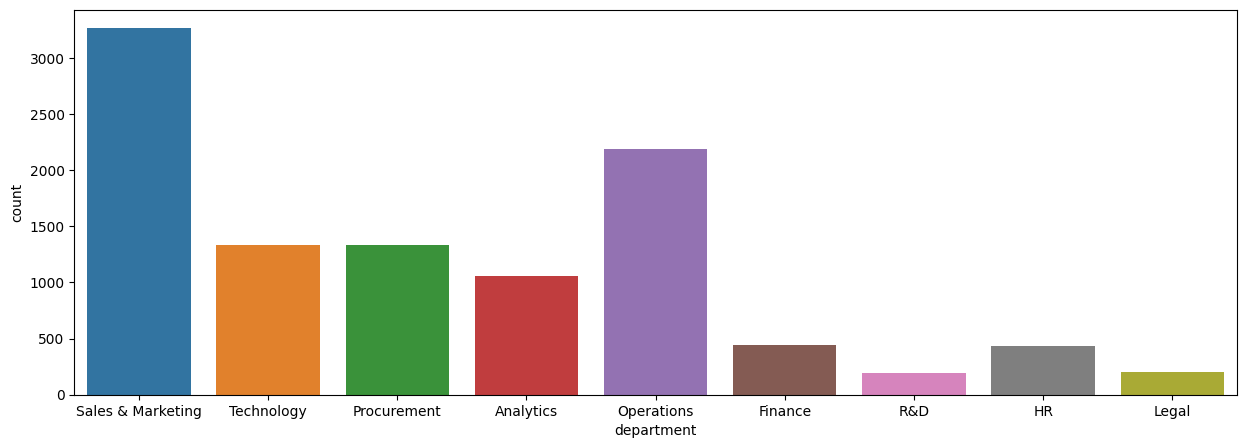

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "department")
plt.show()

#### Most of the employees are from Sales & Marketing and the least number of employees from Legal and R&D department

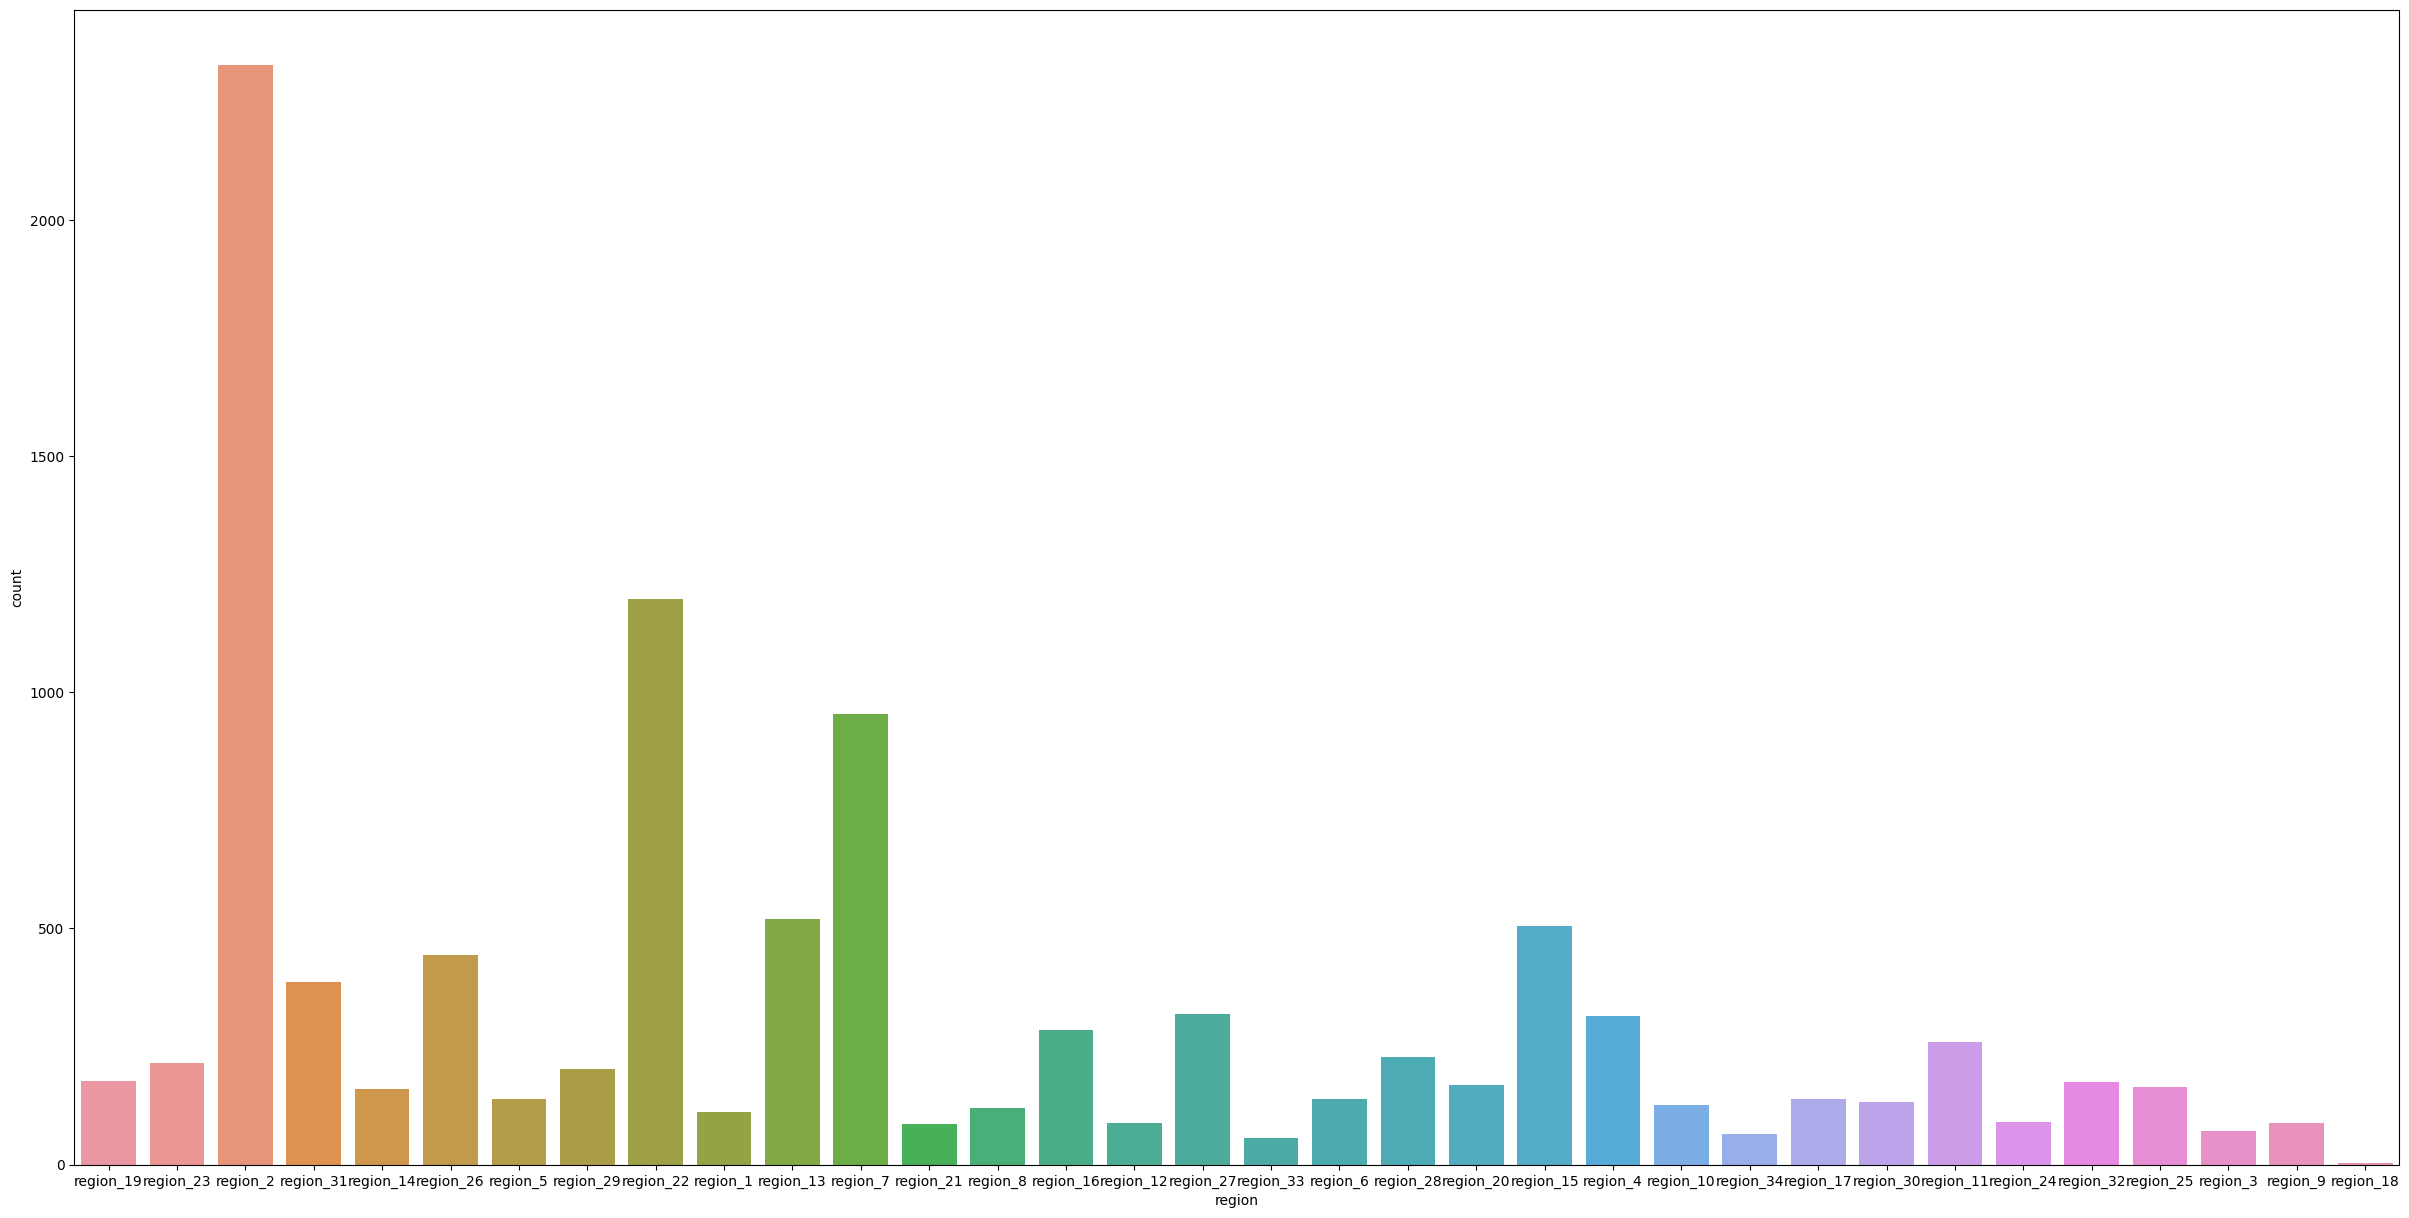

In [28]:
plt.figure(figsize=(30,15))
sns.countplot(data= data, x = "region")
plt.show()

#### Most of the employees are from Region 2 and with least from Region 18

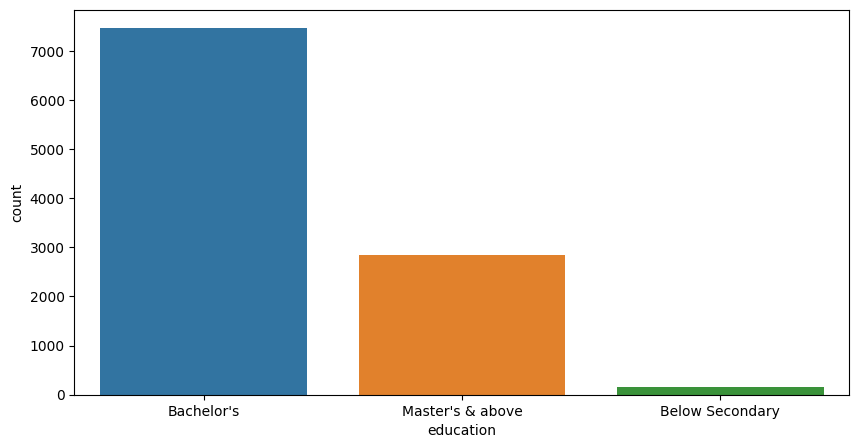

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "education")
plt.show()

<Axes: ylabel='education'>

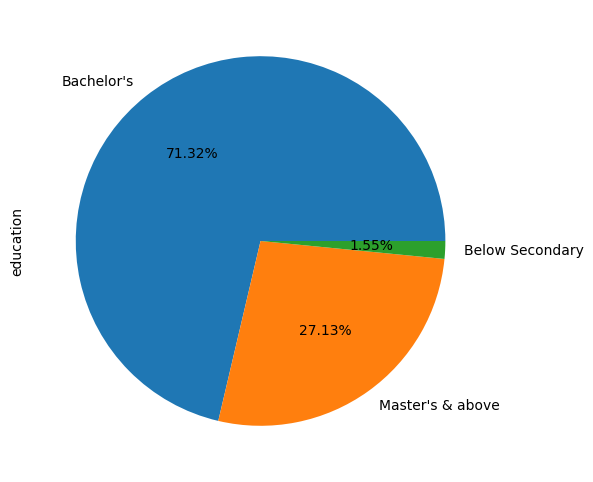

In [30]:
plt.figure(figsize= (6,6))
data['education'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

####  68% of Employees have Bachelor's degree with less than 1% below secondary level.

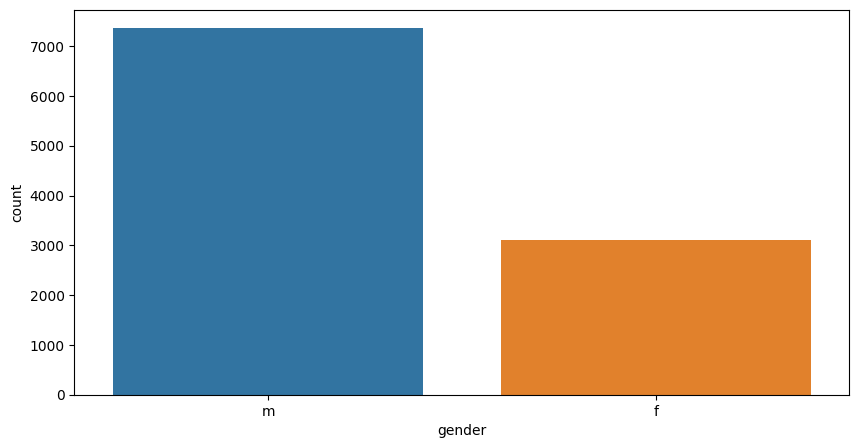

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "gender")
plt.show()

<Axes: ylabel='gender'>

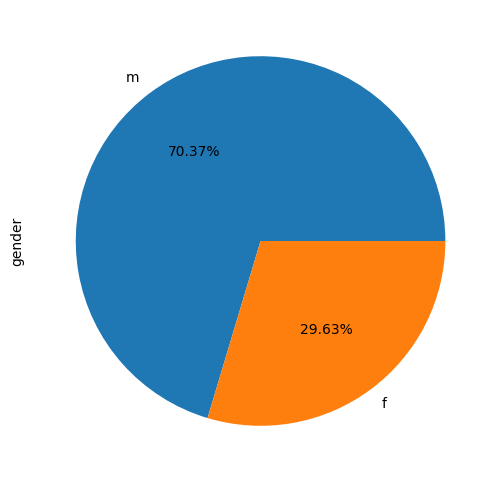

In [32]:
plt.figure(figsize= (6,6))
data['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

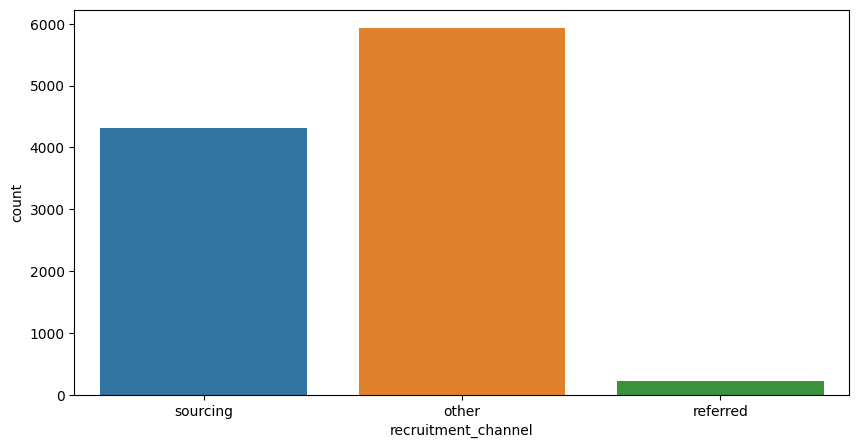

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "recruitment_channel")
plt.show()

<Axes: ylabel='recruitment_channel'>

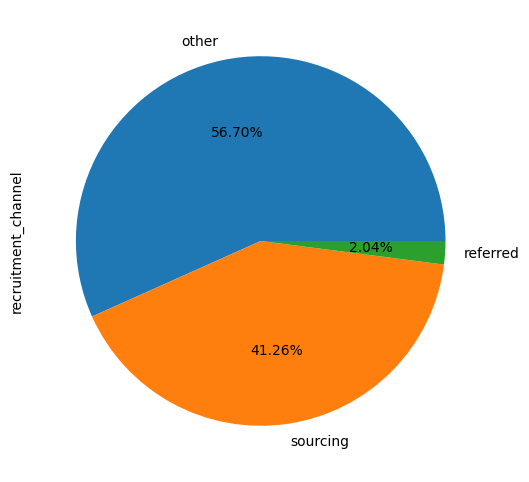

In [34]:
plt.figure(figsize= (6,6))
data['recruitment_channel'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Referred employees are very low, With only 2% Employees being hired by referrals. 55% of employees are from other sources

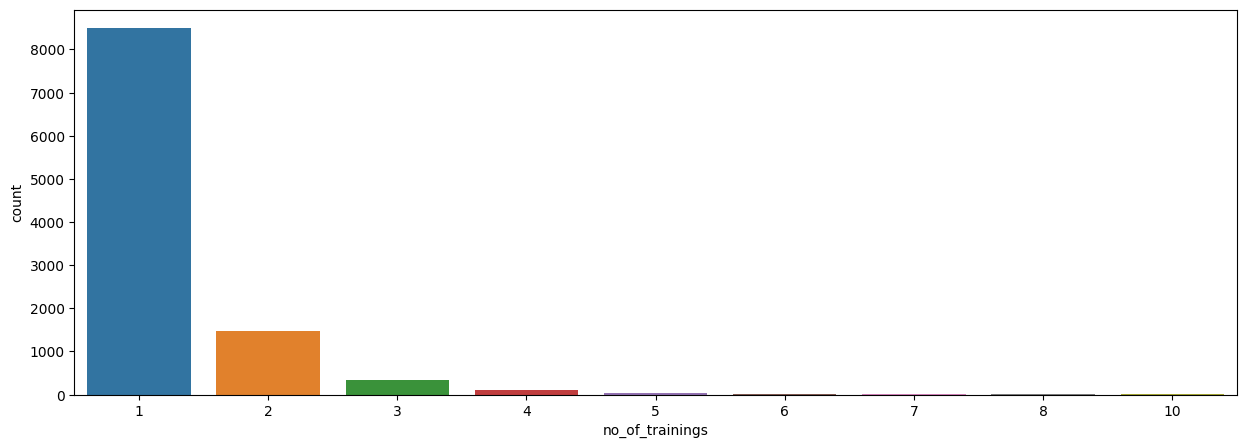

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

<Axes: ylabel='no_of_trainings'>

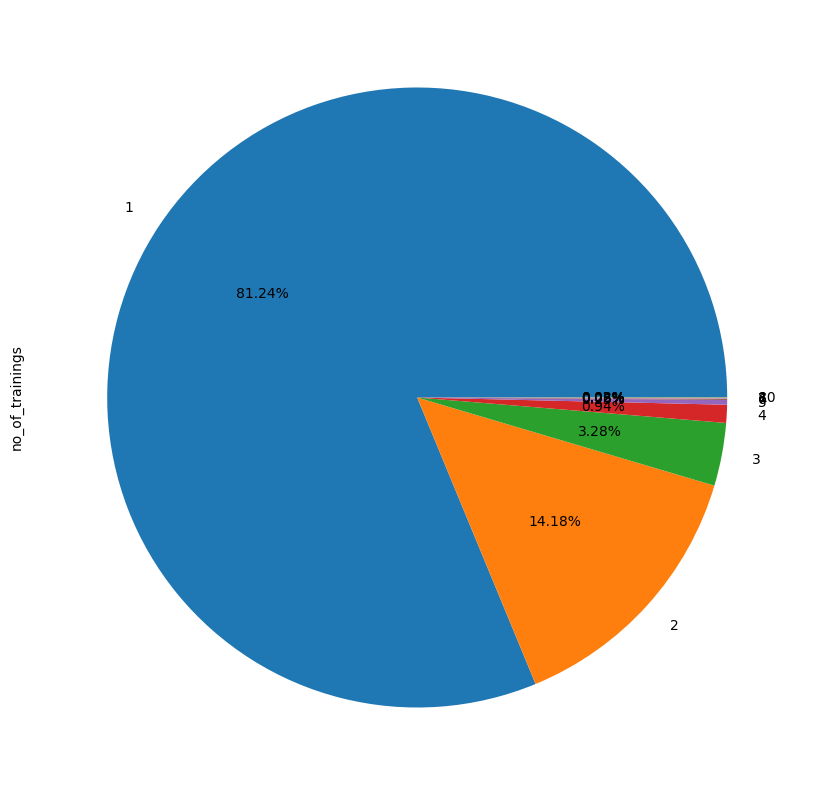

In [36]:
plt.figure(figsize= (10,15))
data['no_of_trainings'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### 80% of the employees have attended atleast 1 training program.

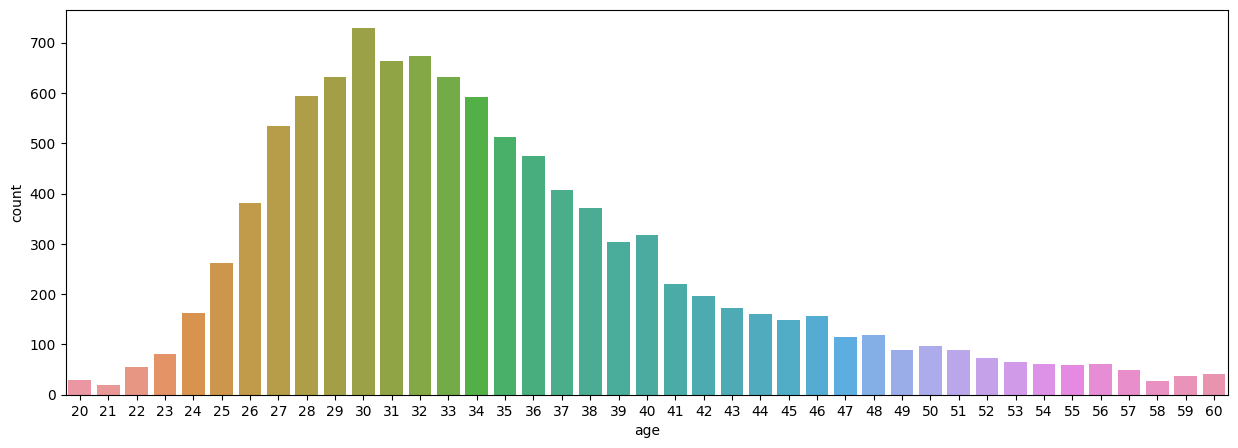

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "age")
plt.show()

#### Most of the Employees are between the age of 25 and 40

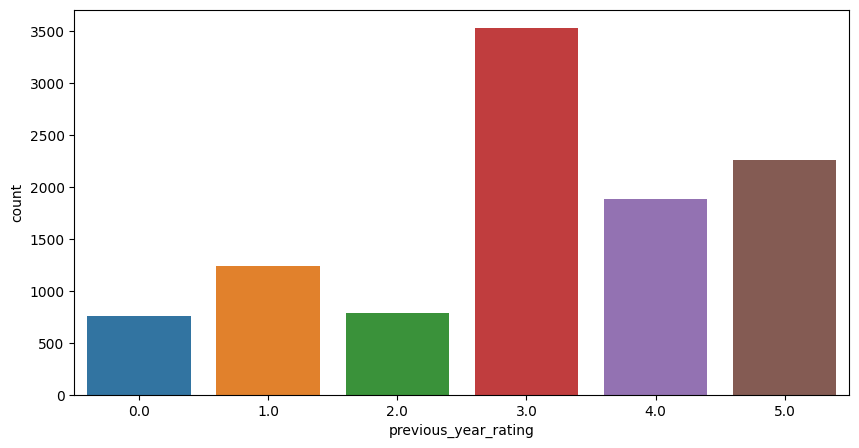

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "previous_year_rating")
plt.show()

<Axes: ylabel='previous_year_rating'>

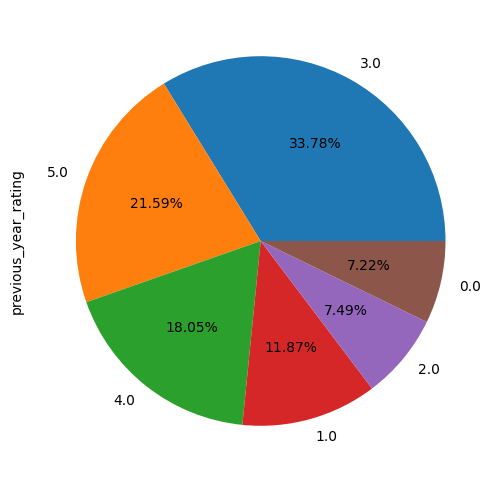

In [39]:
plt.figure(figsize= (6,6))
data['previous_year_rating'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### In previous year rating 37% of Employess are rated 3

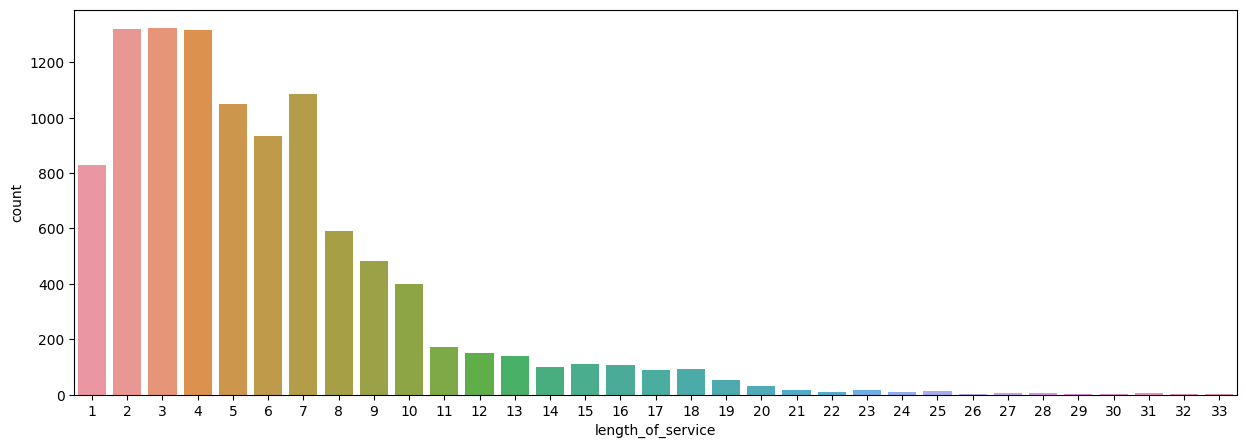

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "length_of_service")
plt.show()



#### Length of service is mostly between 1 to 10 years

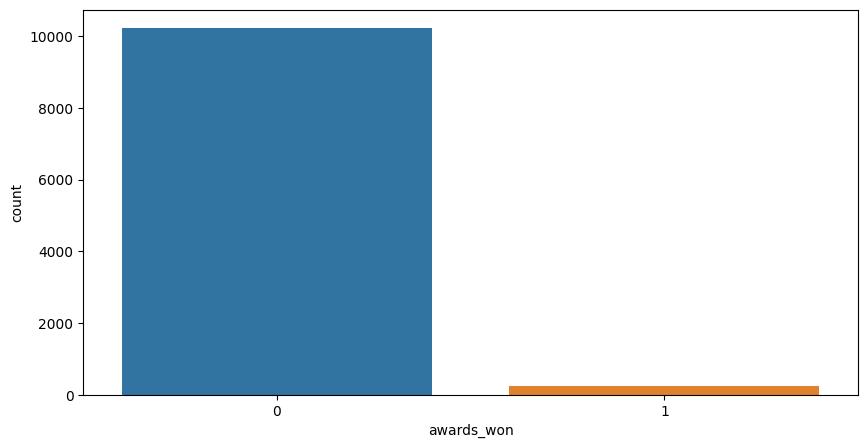

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "awards_won")
plt.show()

<Axes: ylabel='awards_won'>

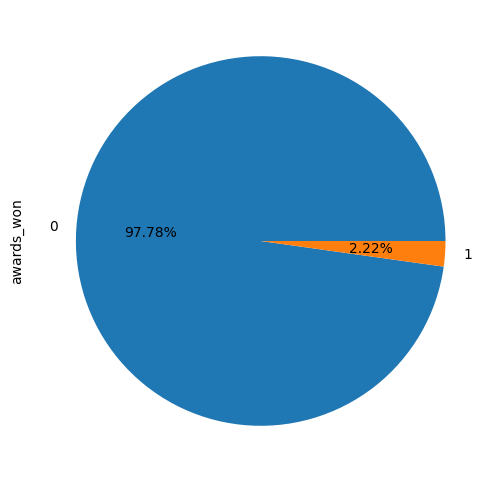

In [42]:
plt.figure(figsize= (6,6))
data['awards_won'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Nearly 2% of the employees have won awards

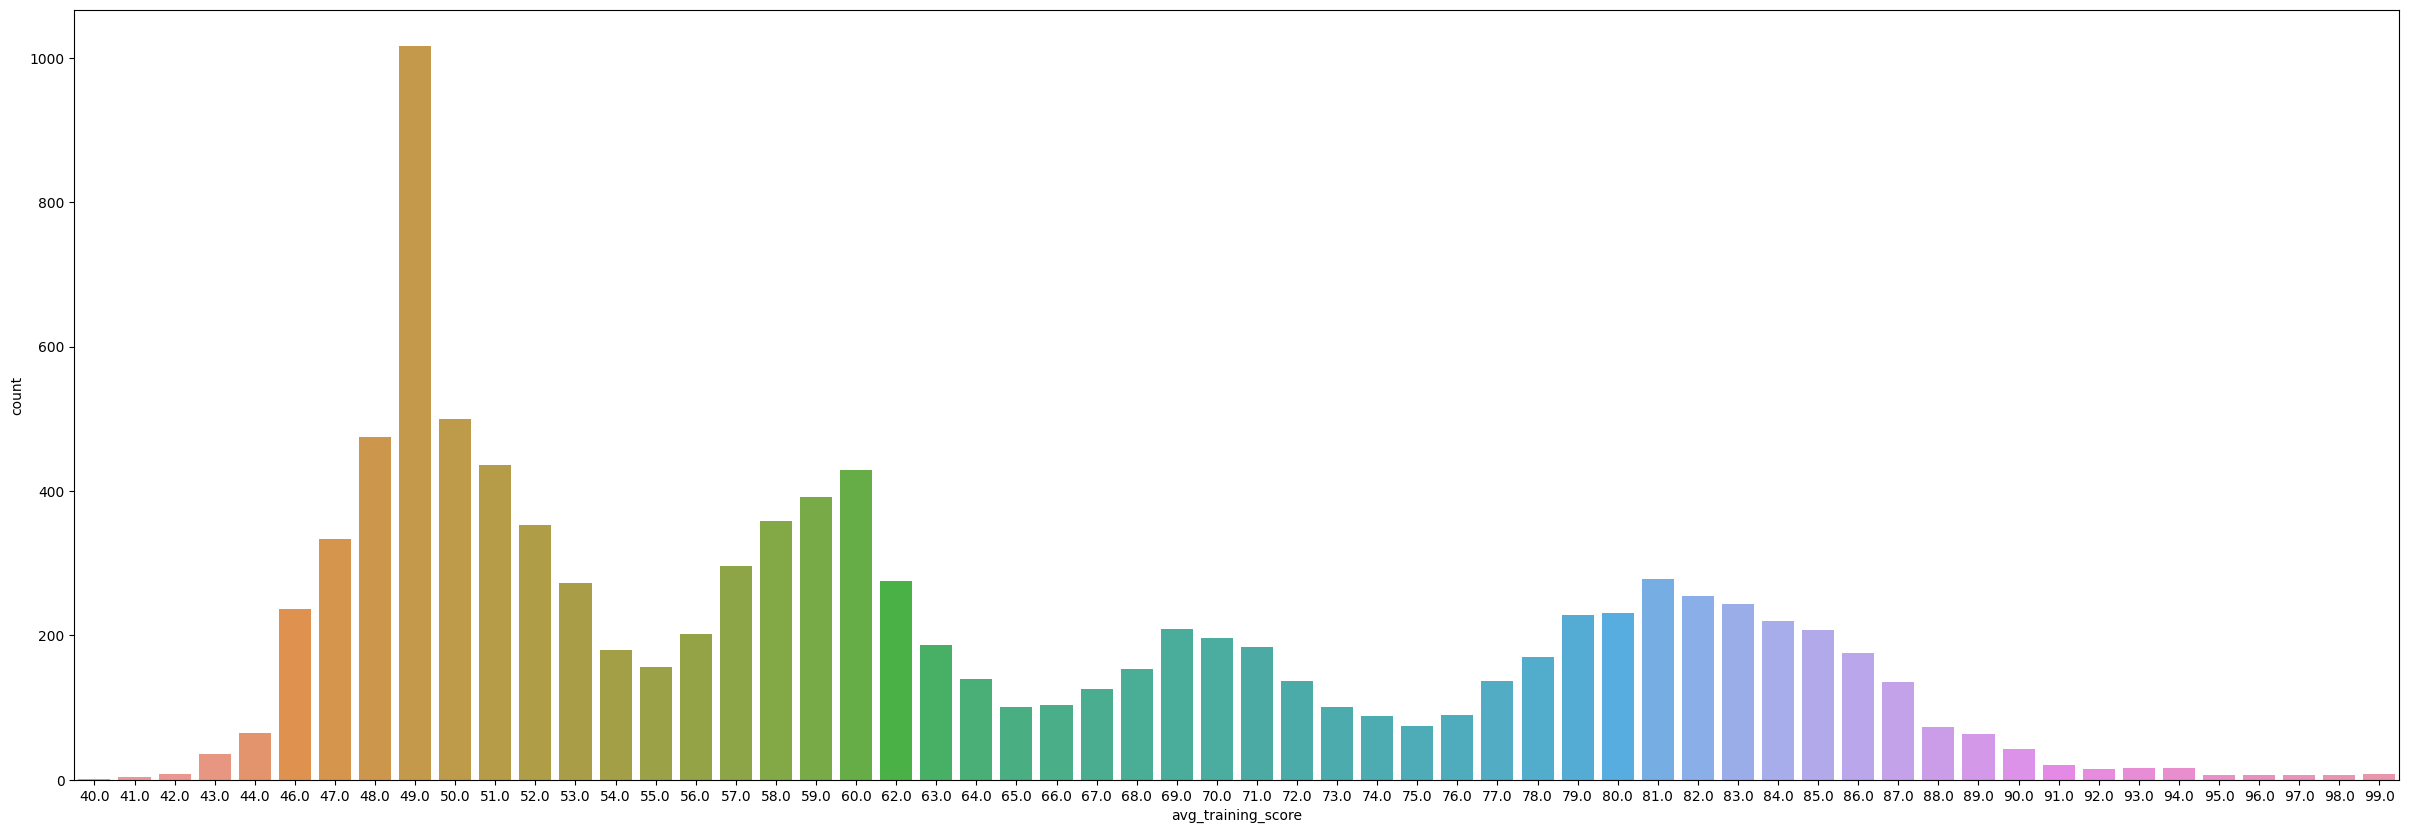

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(data= data, x = "avg_training_score")
plt.show()

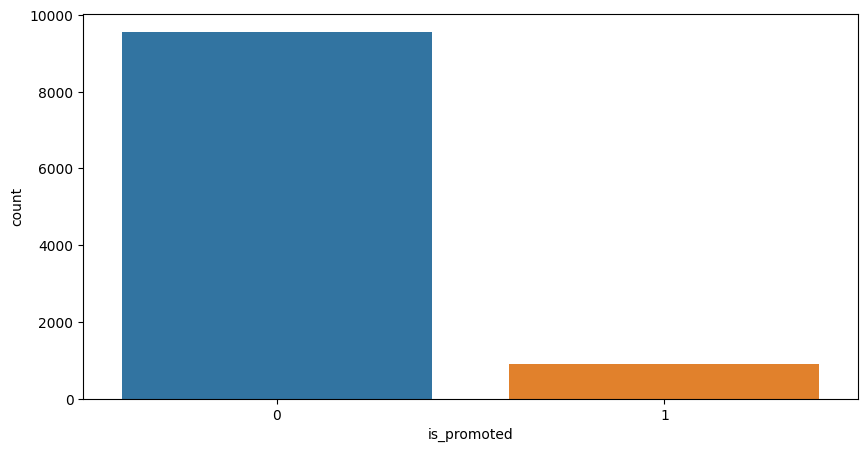

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "is_promoted")
plt.show()

<Axes: ylabel='is_promoted'>

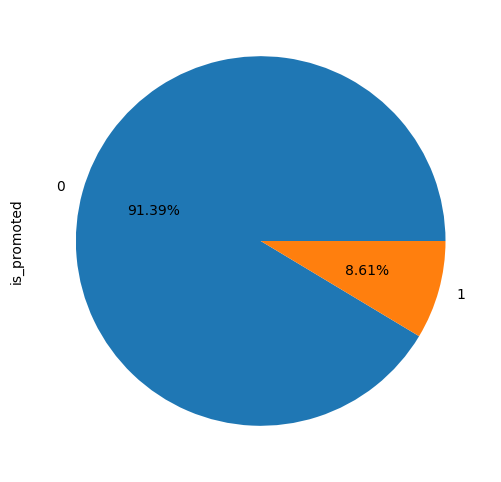

In [45]:
plt.figure(figsize= (6,6))
data['is_promoted'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Data is unbalanced. 91.48% employees are not promoted

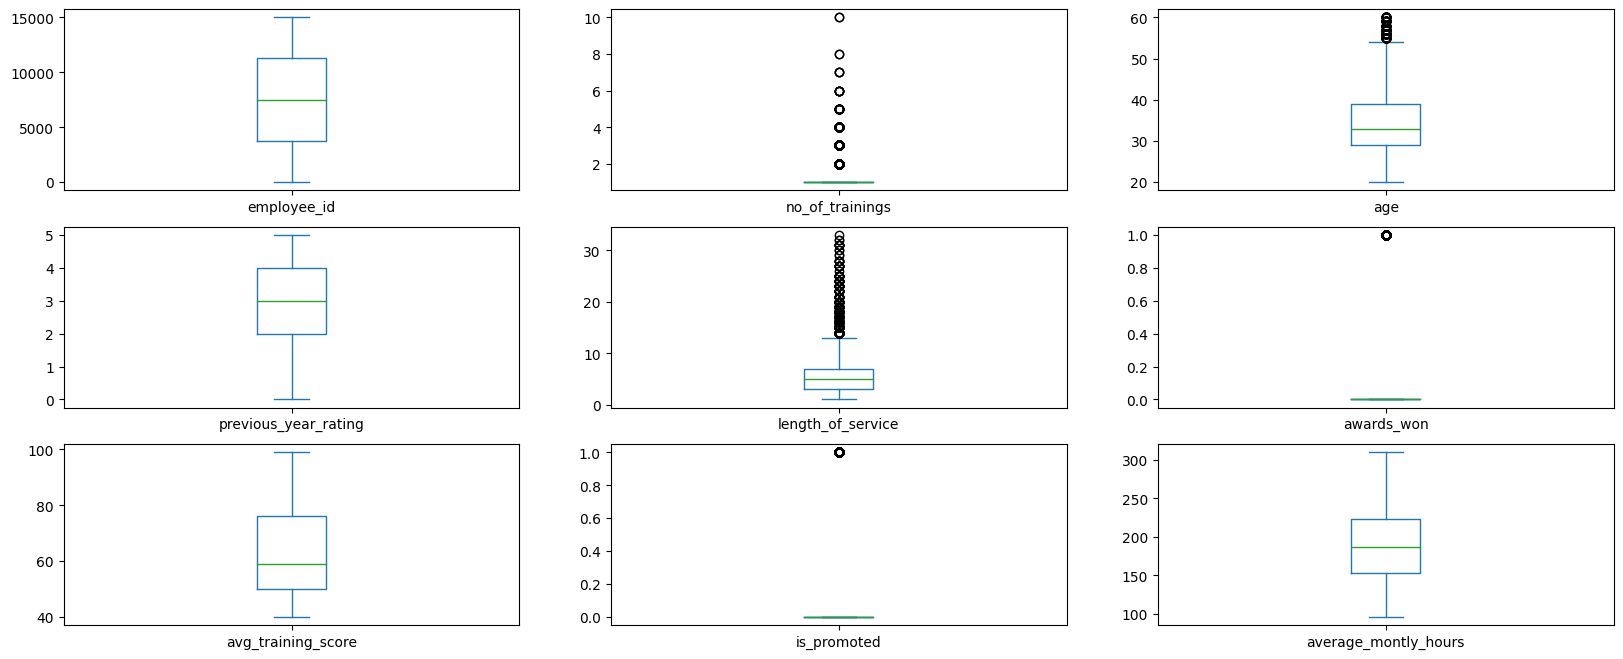

In [46]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(20, 8),sharex=False)
plt.show()

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'awards_won'}>],
       [<Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>,
        <Axes: title={'center': 'average_montly_hours'}>]], dtype=object)

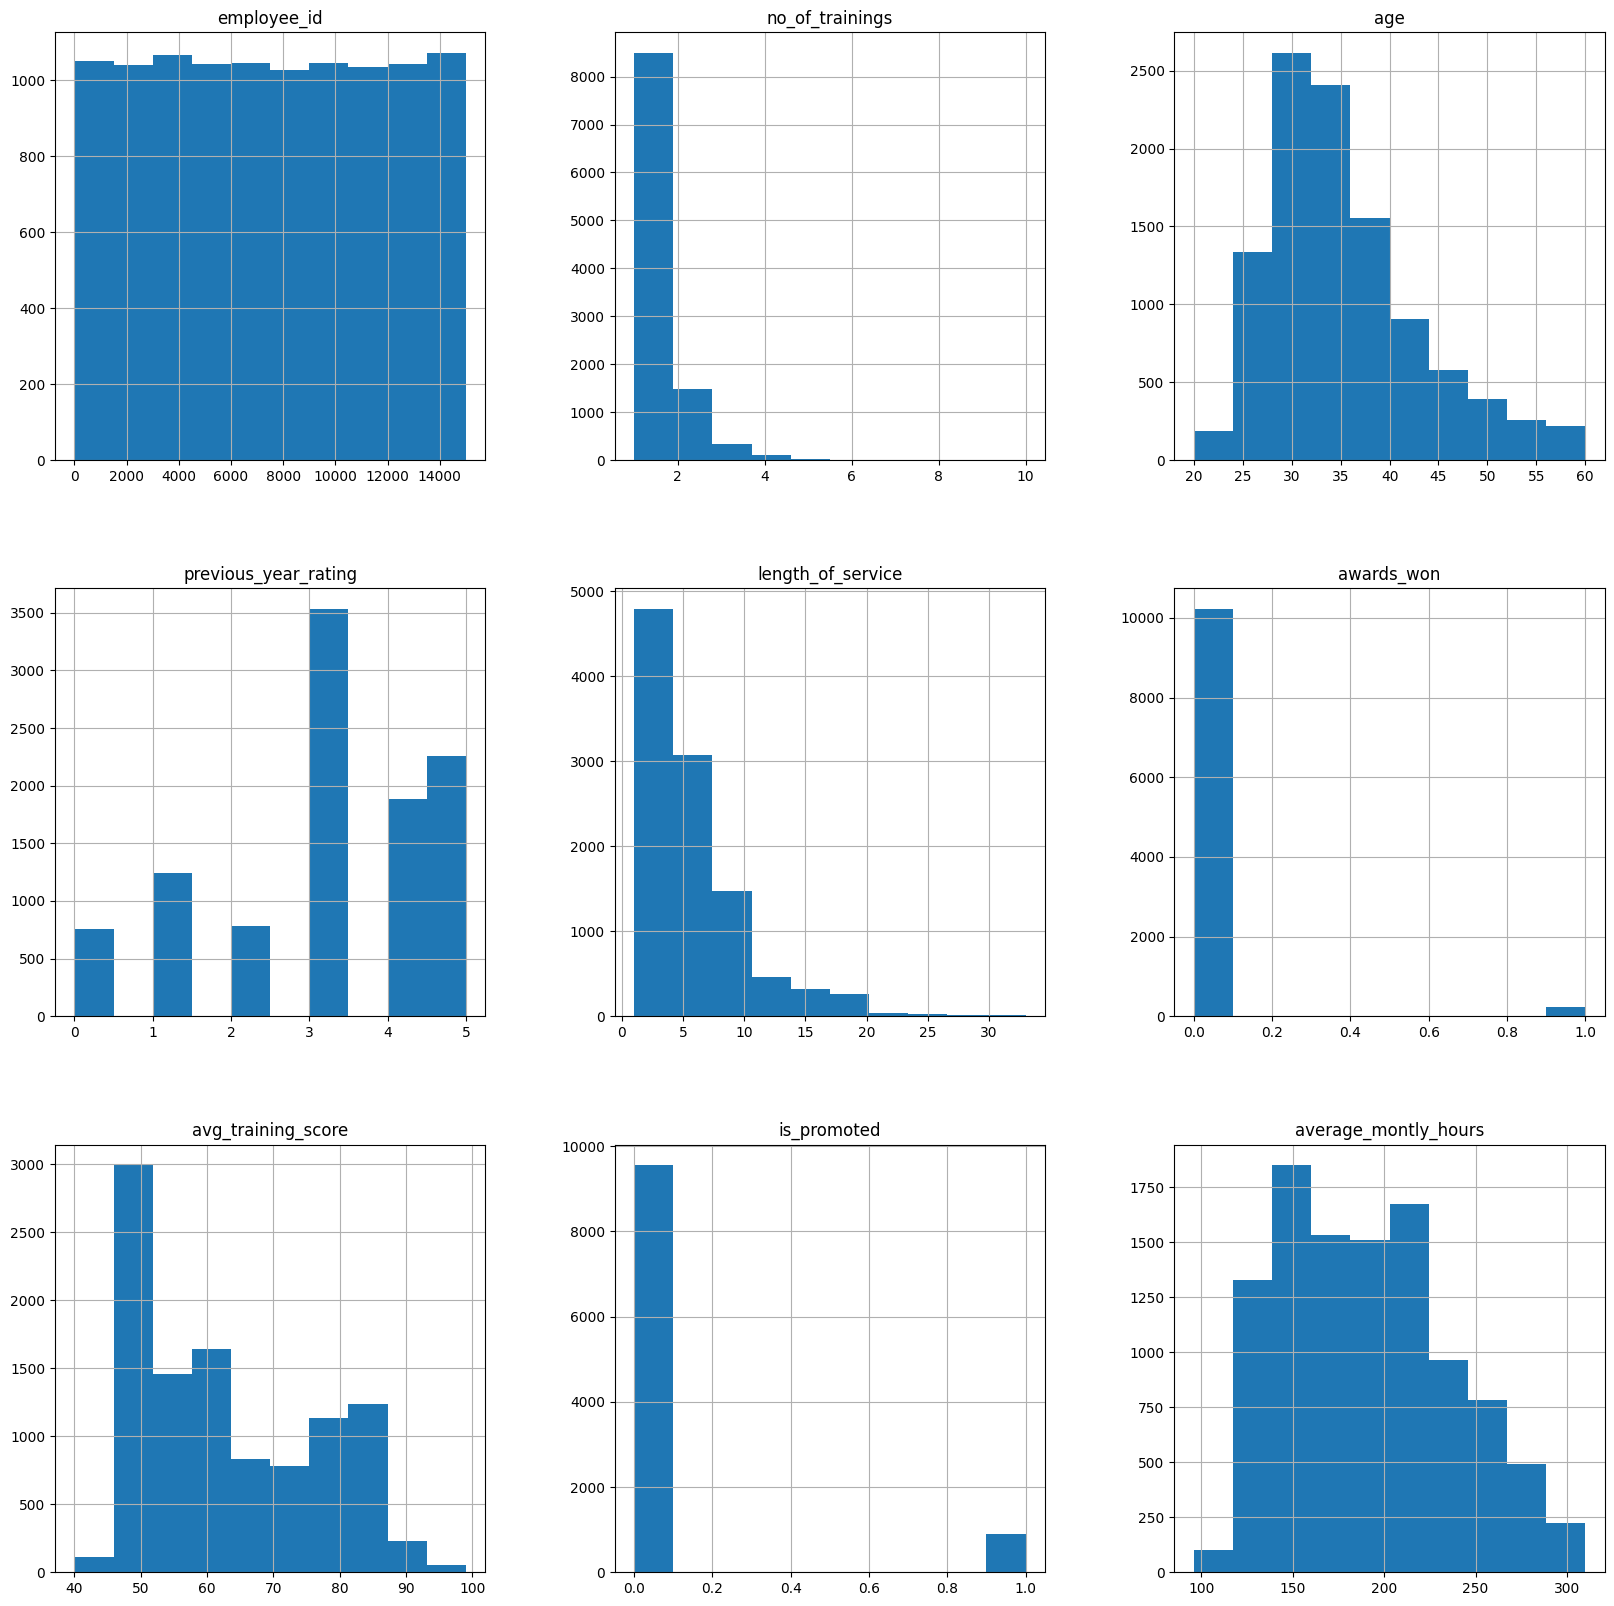

In [47]:
data.hist(figsize=(20,20))

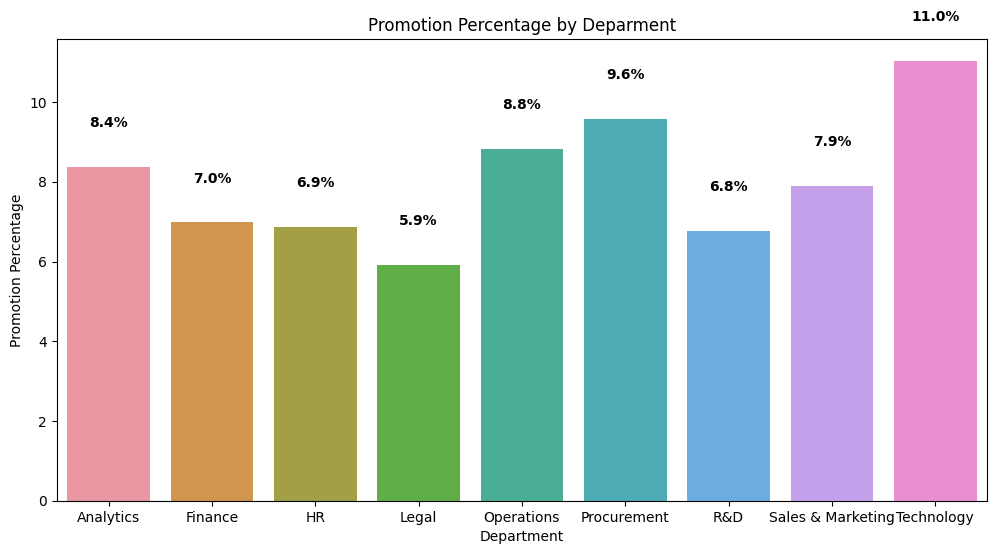

In [48]:
sns.set_palette("Set2")

# group the data by region and calculate the promotion percentage
promotion_pct_by_department = data.groupby('department')['is_promoted'].mean() * 100

# plot the promotion percentage by department
plt.figure(figsize=(12,6))
ax = sns.barplot(x=promotion_pct_by_department.index, y=promotion_pct_by_department.values)
plt.xlabel('Department')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Deparment')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_department.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

#### Most employees are being promoted from  Sales & Marketing, Operations, Technology, Analytics and procurement. All other department employees have least promotion.

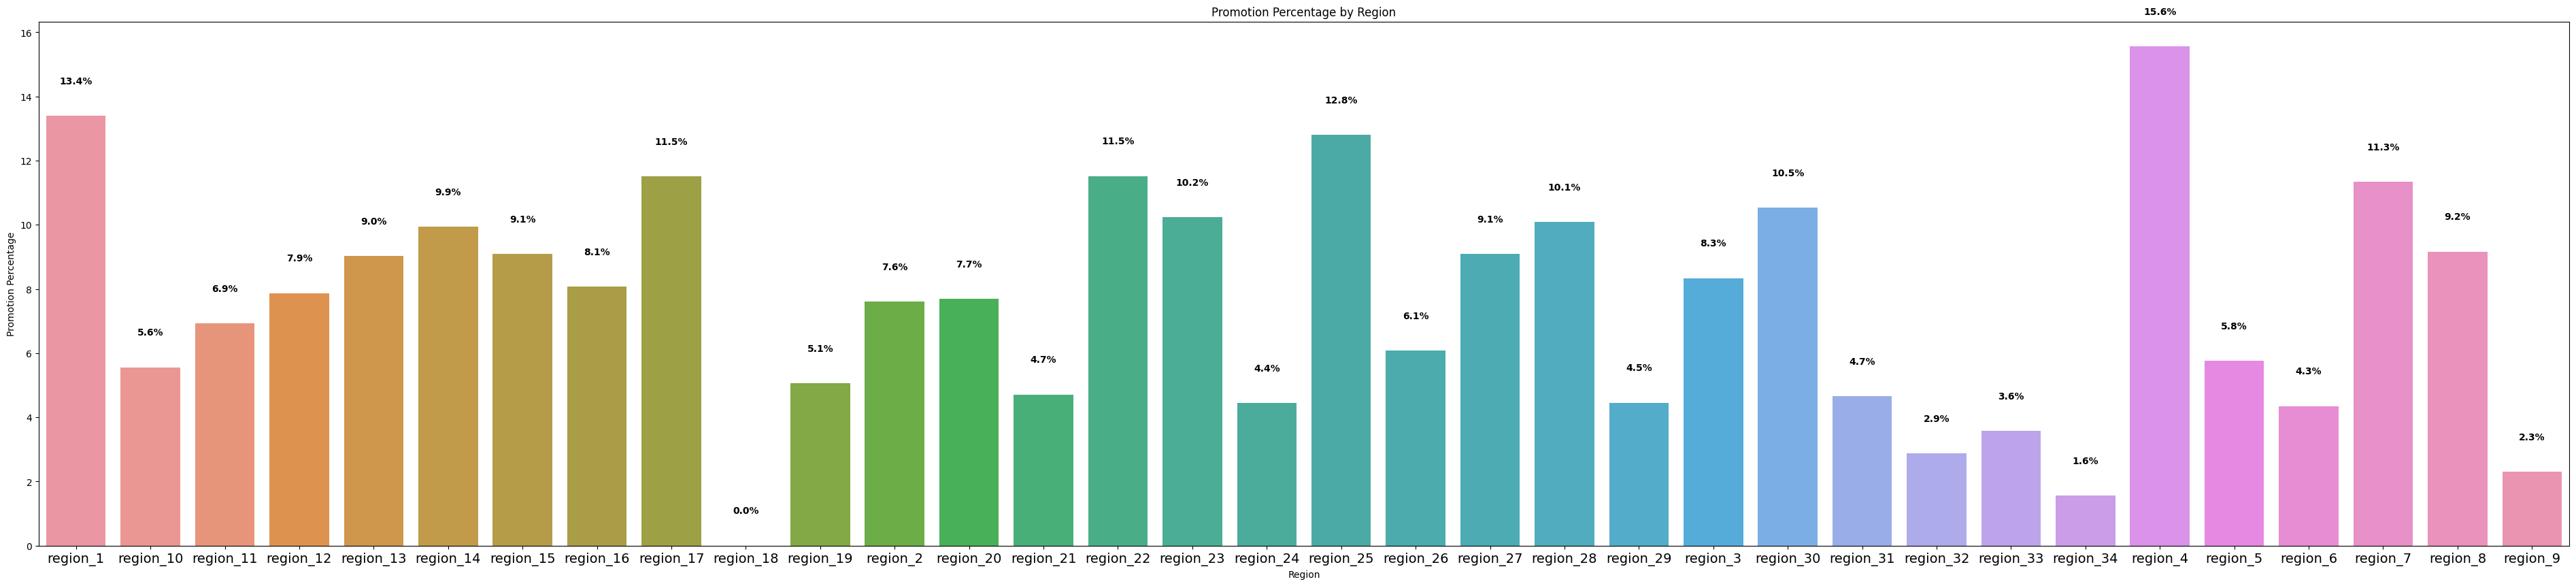

In [49]:
sns.set_palette("Set2")

# group the data by region and calculate the promotion percentage
promotion_pct_by_region = data.groupby('region')['is_promoted'].mean() * 100

# plot the promotion percentage by region
plt.figure(figsize=(48,10))
ax = sns.barplot(x=promotion_pct_by_region.index, y=promotion_pct_by_region.values)
plt.xlabel('Region')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Region')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_region.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.xticks(fontsize=14)
plt.show()

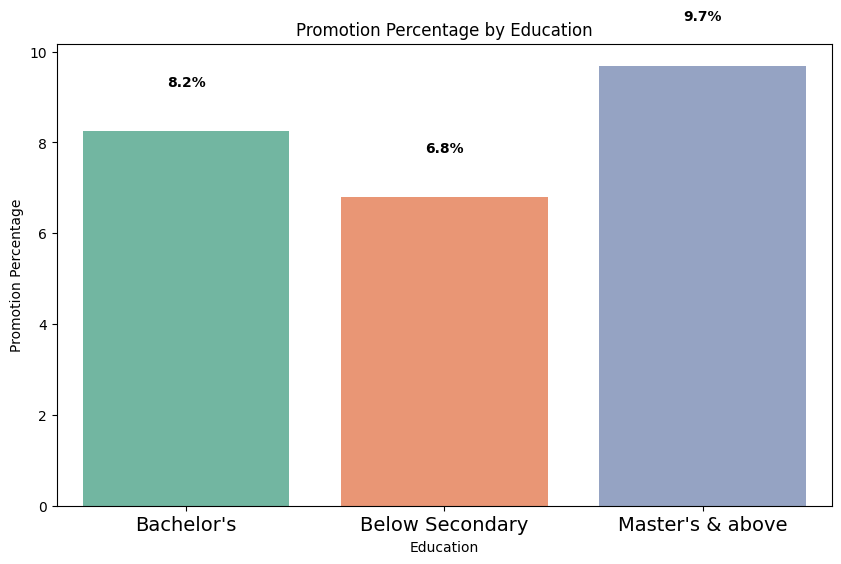

In [50]:
sns.set_palette("Set2")

# group the data by education and calculate the promotion percentage
promotion_pct_by_education = data.groupby('education')['is_promoted'].mean() * 100

# plot the promotion percentage by education
plt.figure(figsize=(10,6))
ax = sns.barplot(x=promotion_pct_by_education.index, y=promotion_pct_by_education.values)
plt.xlabel('Education')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Education')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_education.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.xticks(fontsize=14)
plt.show()

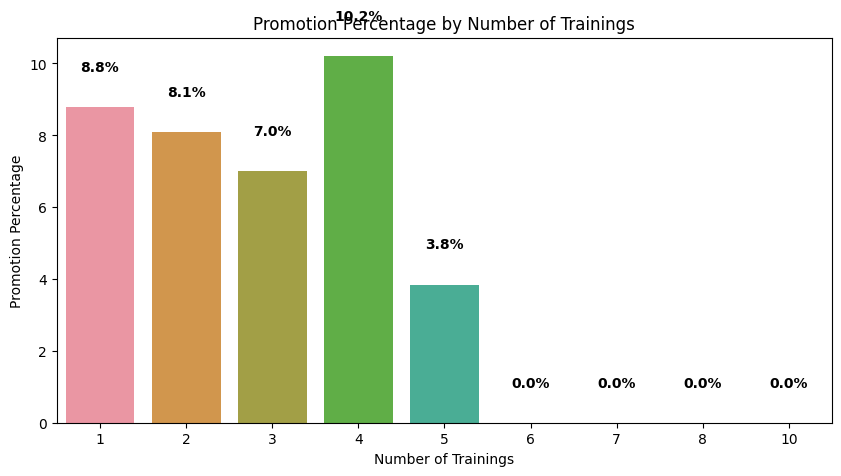

In [51]:
sns.set_palette("Set2")

# group the data by number of trainings and calculate the promotion percentage
promotion_pct_by_trainings = data.groupby('no_of_trainings')['is_promoted'].mean() * 100

# plot the promotion percentage by number of trainings
plt.figure(figsize=(10,5))
ax = sns.barplot(x=promotion_pct_by_trainings.index, y=promotion_pct_by_trainings.values)
plt.xlabel('Number of Trainings')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Number of Trainings')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_trainings.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

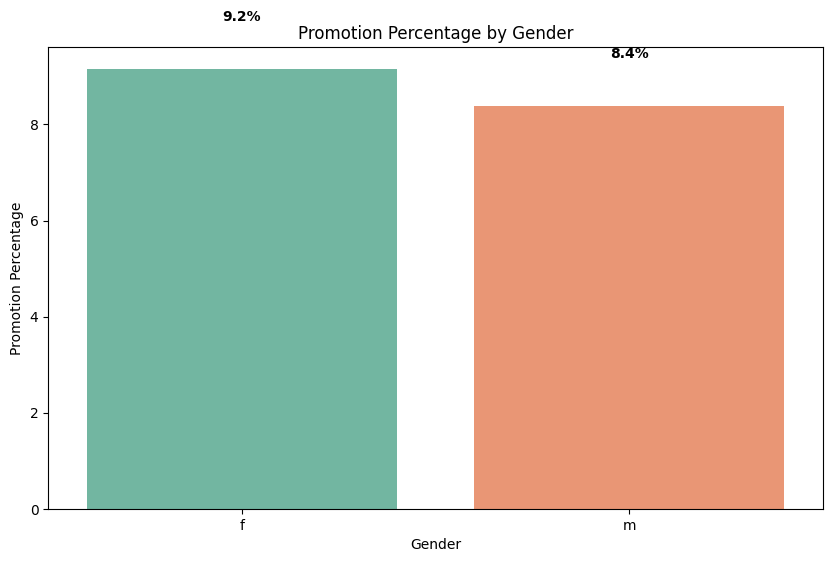

In [52]:
sns.set_palette("Set2")

# group the data by gender and calculate the promotion percentage
promotion_pct_by_gender = data.groupby('gender')['is_promoted'].mean() * 100

# plot the promotion percentage by gender
plt.figure(figsize=(10,6))
ax = sns.barplot(x=promotion_pct_by_gender.index, y=promotion_pct_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Gender')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_gender.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

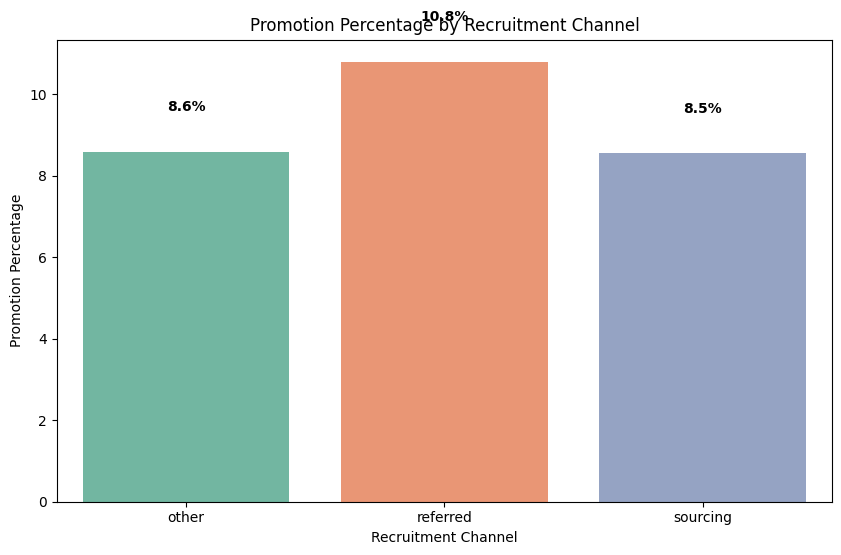

In [53]:
sns.set_palette("Set2")

# group the data by region and calculate the promotion percentage
promotion_pct_by_channel = data.groupby('recruitment_channel')['is_promoted'].mean() * 100

# plot the promotion percentage by gender
plt.figure(figsize=(10,6))
ax = sns.barplot(x=promotion_pct_by_channel.index, y=promotion_pct_by_channel.values)
plt.xlabel('Recruitment Channel')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Recruitment Channel')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_channel.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')


plt.show()

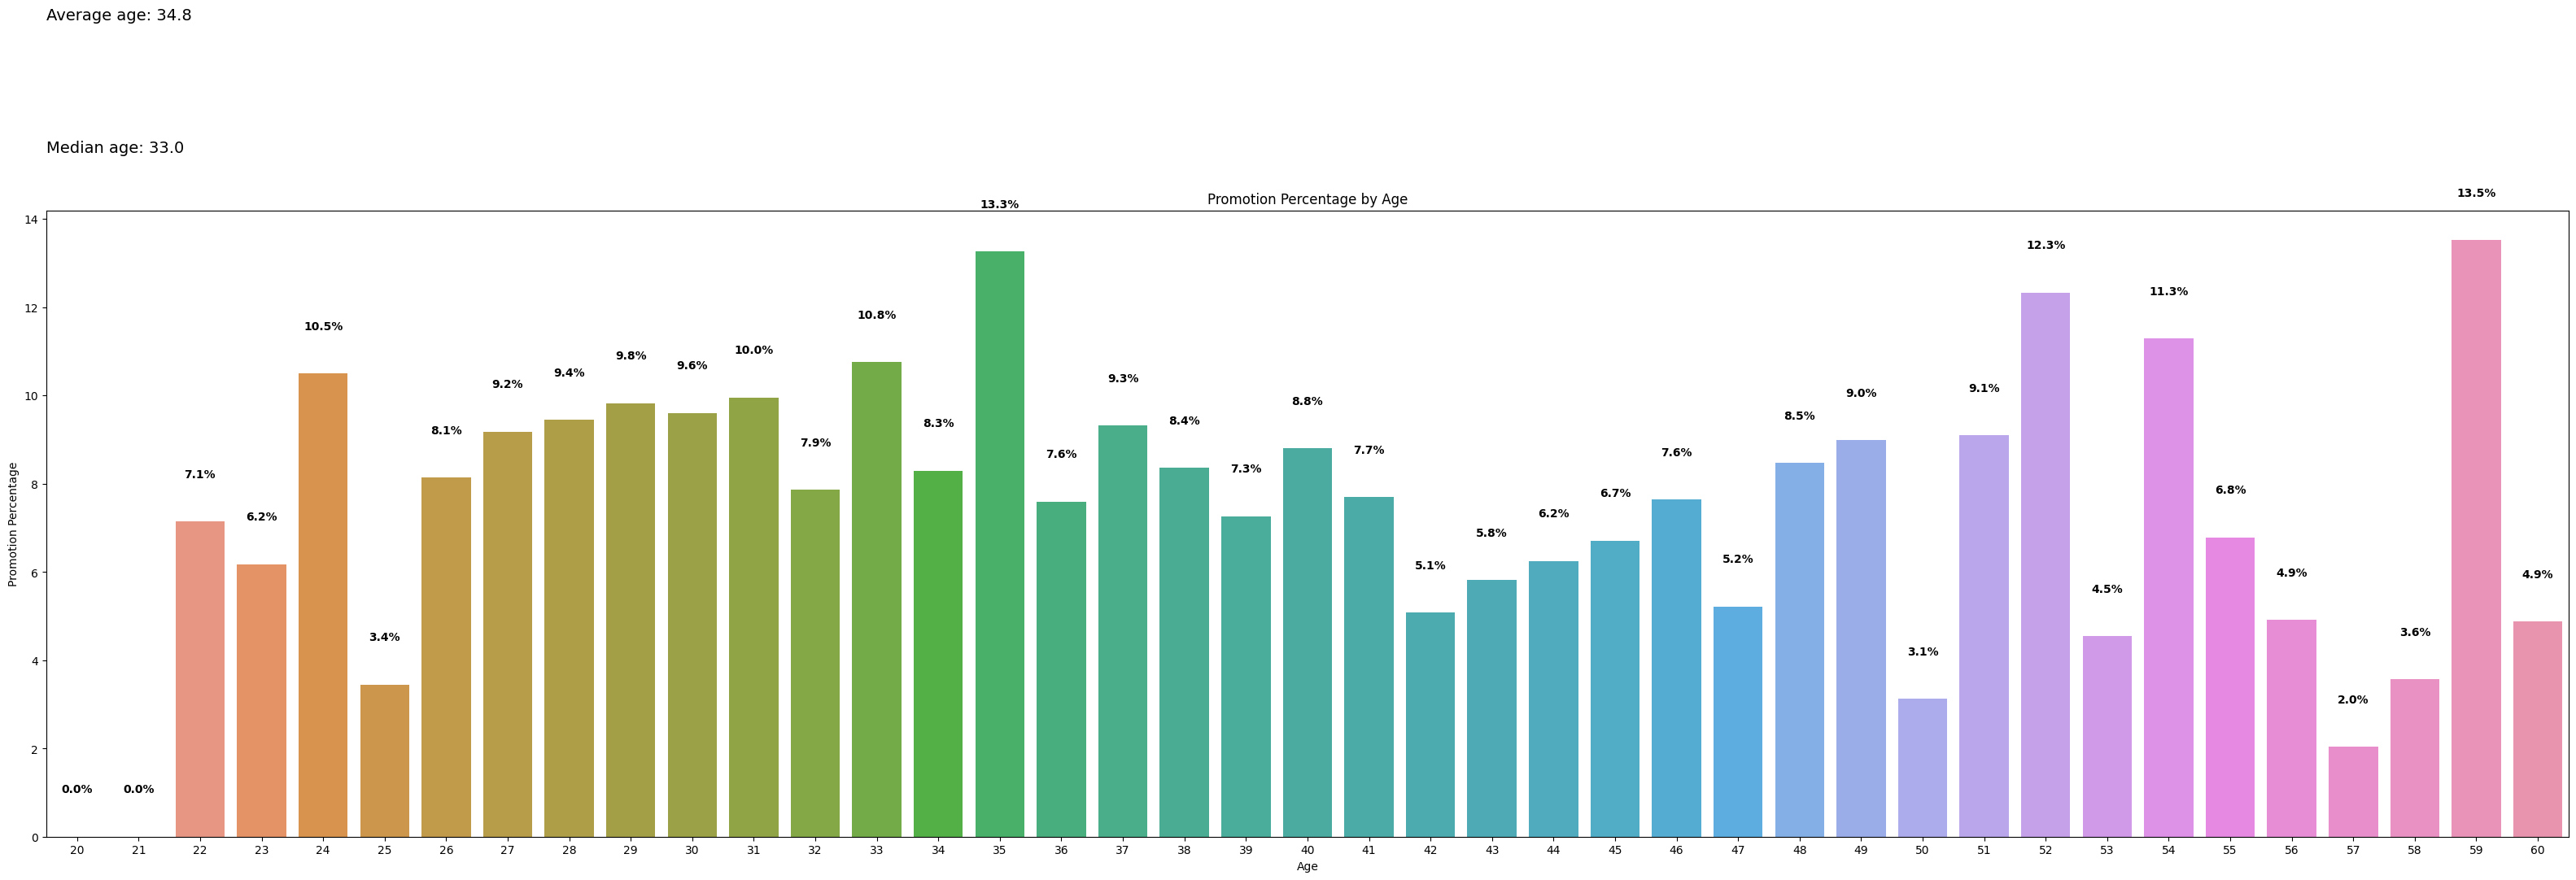

In [54]:
# Calculate promotion percentage by age
promotion_pct_by_age = data.groupby('age')['is_promoted'].mean() * 100

# Plot promotion percentage by age
plt.figure(figsize=(40,10))
ax = sns.barplot(x=promotion_pct_by_age.index, y=promotion_pct_by_age.values)
plt.xlabel('Age')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Age')

# Add text for average and median age
age_stats = data['age'].describe()
ax.text(-0.5, promotion_pct_by_age.max() + 5, f"Average age: {age_stats['mean']:.1f}", ha='left', fontsize=14)
ax.text(-0.5, promotion_pct_by_age.max() + 2, f"Median age: {age_stats['50%']}", ha='left', fontsize=14)

# Add promotion percentage values as text on the bars
for i, v in enumerate(promotion_pct_by_age.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

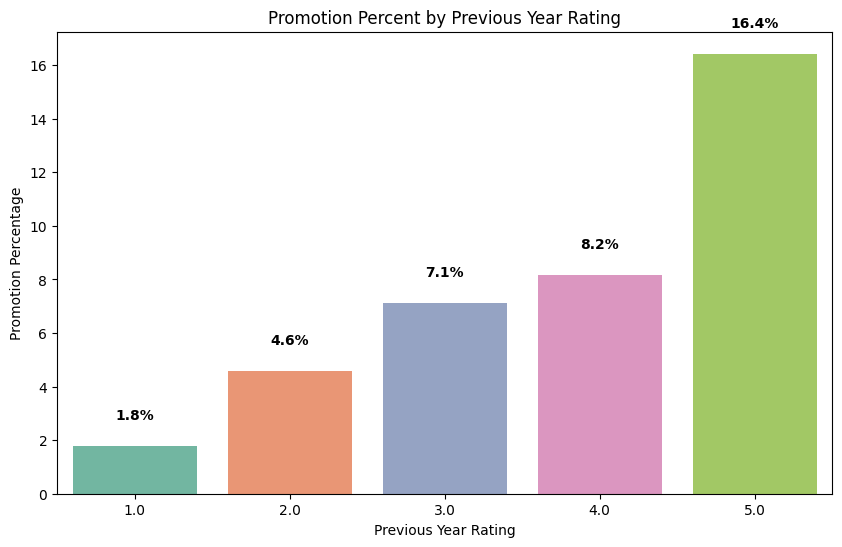

In [55]:
# filter out rows where previous_year_rating is equal to 0
data_filtered = data[data['previous_year_rating'] != 0]

# group the data by previous year and calculate the promotion percent
promotion_pct_by_previous_year_rating = data_filtered.groupby('previous_year_rating')['is_promoted'].mean() * 100

# plot the promotion percent by previous_year_rating
plt.figure(figsize=(10,6))
ax = sns.barplot(x=promotion_pct_by_previous_year_rating.index, y=promotion_pct_by_previous_year_rating.values, palette="Set2")
plt.xlabel('Previous Year Rating')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percent by Previous Year Rating')
# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_previous_year_rating.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

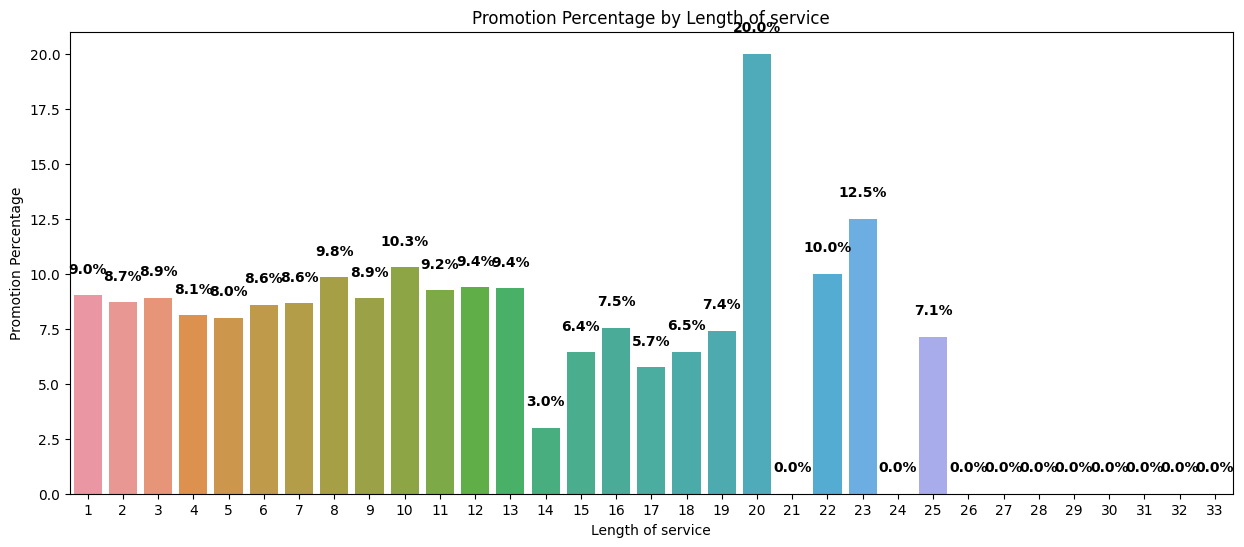

In [56]:
sns.set_palette("Set2")

# group the data by length of service and calculate the promotion percentage
promotion_pct_by_service = data.groupby('length_of_service')['is_promoted'].mean() * 100

# plot the promotion percentage by length of service
plt.figure(figsize=(15,6))
ax = sns.barplot(x=promotion_pct_by_service.index, y=promotion_pct_by_service.values)
plt.xlabel('Length of service')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Length of service')
# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_service.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')


plt.show()

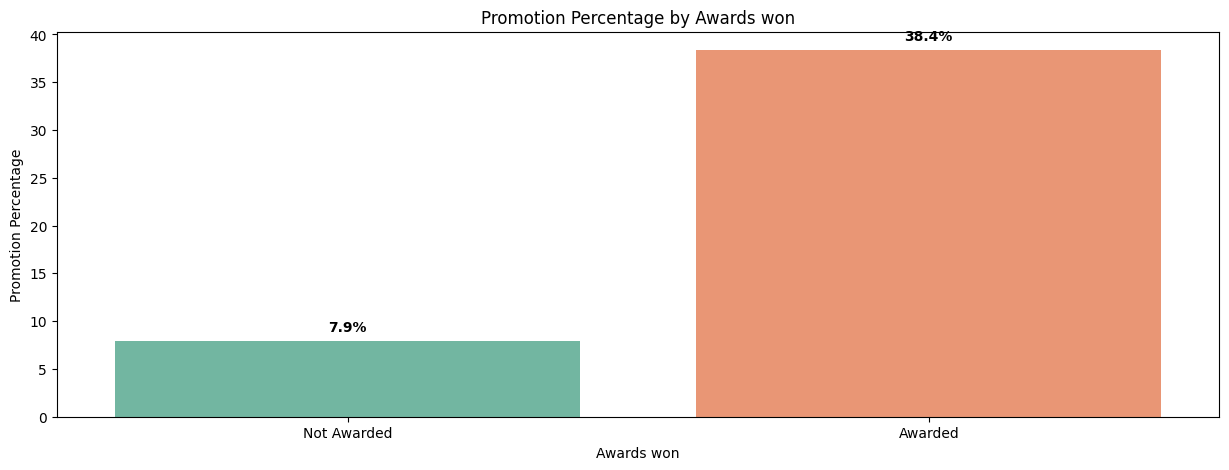

In [57]:
sns.set_palette("Set2")

# group the data by awards won and calculate the promotion percentage
promotion_pct_by_awards = data.groupby('awards_won')['is_promoted'].mean() * 100

# plot the promotion percentage by awards
plt.figure(figsize=(15,5))
ax = sns.barplot(x=promotion_pct_by_awards.index, y=promotion_pct_by_awards.values)
plt.xlabel('Awards won')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Awards won')
ax.set_xticklabels(['Not Awarded', 'Awarded'])
# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_awards.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')



plt.show()

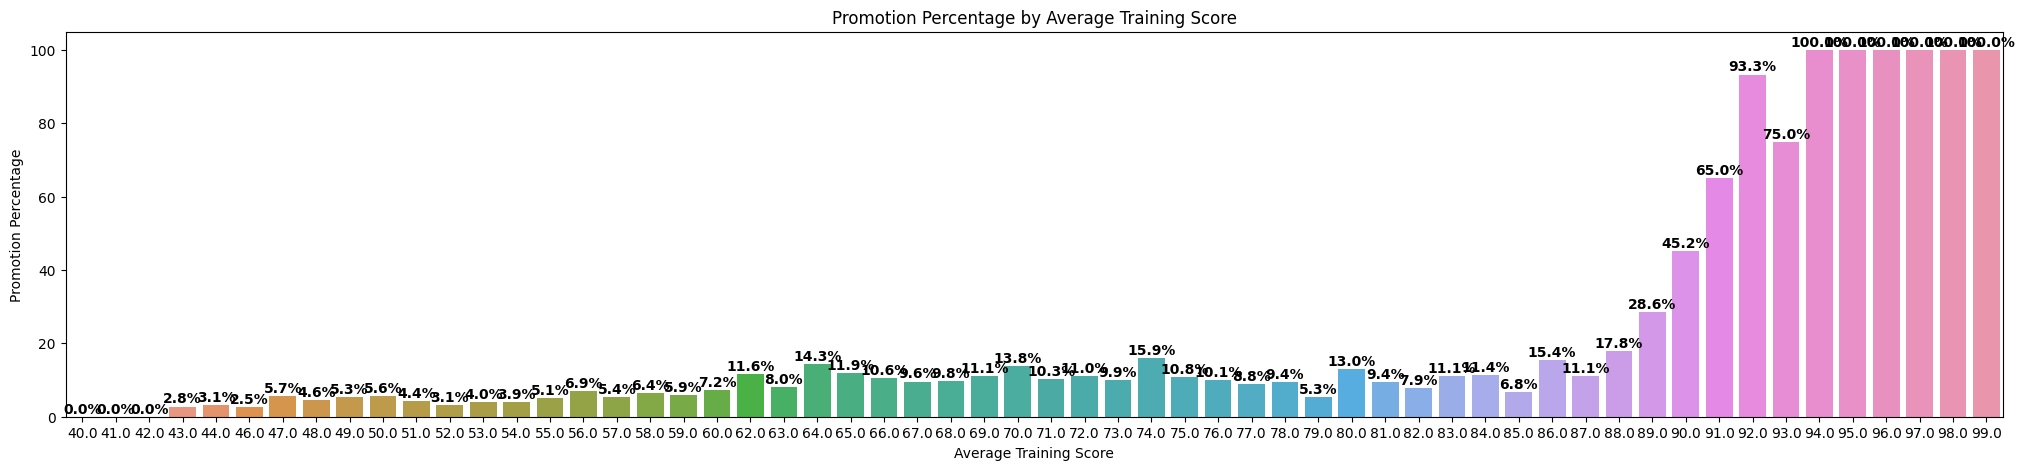

In [58]:
sns.set_palette("Set2")

# group the data by Average training score  won and calculate the promotion percentage
promotion_pct_by_average_score = data.groupby('avg_training_score')['is_promoted'].mean() * 100

# plot the promotion percentage by average training score
plt.figure(figsize=(25,5))
ax = sns.barplot(x=promotion_pct_by_average_score.index, y=promotion_pct_by_average_score.values)
plt.xlabel('Average Training Score')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Average Training Score')

# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_average_score.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')


plt.show()

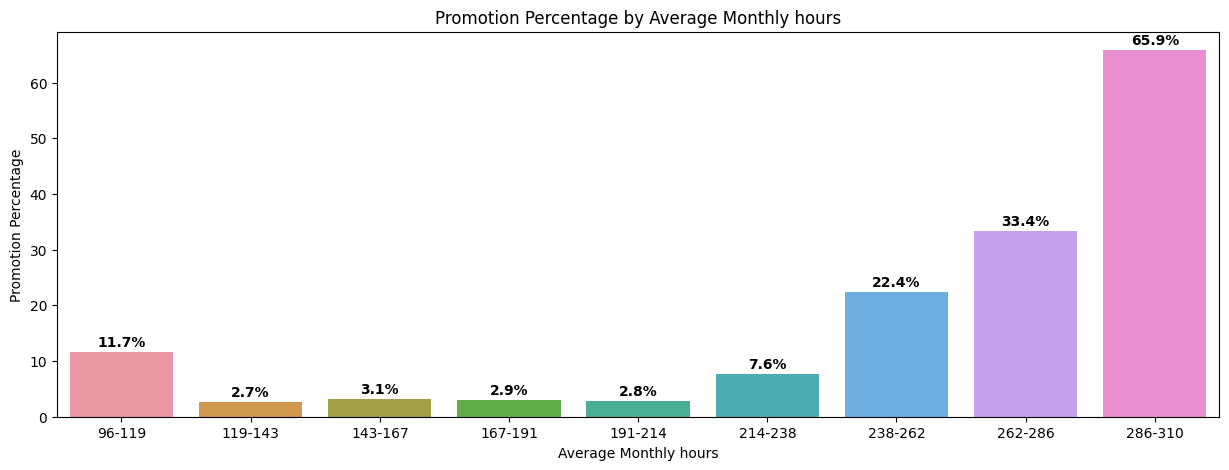

In [59]:
# set the color palette to "Set2"
sns.set_palette("Set2")

# bin the data into 10 intervals of equal width
bins = np.linspace(data['average_montly_hours'].min(), data['average_montly_hours'].max(), 10)
promotion_pct_by_average_hours = data.groupby(pd.cut(data['average_montly_hours'], bins))['is_promoted'].mean() * 100

# convert the index to a pandas Series
promotion_pct_by_average_hours.index = pd.Series(promotion_pct_by_average_hours.index).apply(lambda x: f'{int(x.left)}-{int(x.right)}')

# plot the mean promotion percentage by average monthly hours bin
plt.figure(figsize=(15,5))
ax = sns.barplot(x=promotion_pct_by_average_hours.index, y=promotion_pct_by_average_hours.values)
plt.xlabel('Average Monthly hours')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Average Monthly hours')
# add the percentage values above each bar
for i, v in enumerate(promotion_pct_by_average_hours.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

In [60]:
col=['department','region','education','gender','recruitment_channel']
le=LabelEncoder()
data[col] = data[col].apply(le.fit_transform)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,average_montly_hours
0,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0,197
1,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0,124
2,7152,8,11,0,1,0,1,38,3.0,5,0,77.0,0,237
3,9403,7,24,0,1,0,1,34,1.0,4,0,51.0,0,161
4,12067,5,5,0,1,0,1,35,3.0,7,0,75.0,0,122


In [61]:
data=data.drop('employee_id', axis=1)

In [62]:
data.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,average_montly_hours
department,1.000000,-0.019133,0.049228,-0.026787,0.000675,0.017765,0.082425,-0.109398,0.061926,0.009830,-0.248477,0.015926,0.005058
region,-0.019133,1.000000,0.005908,0.026495,-0.001438,0.007449,-0.083427,-0.029727,-0.049190,0.003157,0.029183,0.006701,0.011742
education,0.049228,0.005908,1.000000,-0.042682,-0.002069,-0.006625,0.329992,0.077980,0.246833,-0.005451,0.025979,0.022331,0.006372
gender,-0.026787,0.026495,-0.042682,1.000000,-0.005469,0.072209,-0.019137,-0.020061,-0.014783,0.011008,-0.002287,-0.012703,-0.016893
recruitment_channel,0.000675,-0.001438,-0.002069,-0.005469,1.000000,-0.012234,-0.006737,0.016851,-0.000147,0.005188,0.000117,-0.000319,0.011445
no_of_trainings,0.017765,0.007449,-0.006625,0.072209,-0.012234,1.000000,-0.066901,-0.069542,-0.040634,0.007664,0.047196,-0.014304,-0.009276
age,0.082425,-0.083427,0.329992,-0.019137,-0.006737,-0.066901,1.000000,0.168425,0.659735,-0.011883,-0.061958,-0.018558,-0.009215
previous_year_rating,-0.109398,-0.029727,0.077980,-0.020061,0.016851,-0.069542,0.168425,1.000000,0.186411,0.015470,0.055289,0.122984,0.034773
length_of_service,0.061926,-0.049190,0.246833,-0.014783,-0.000147,-0.040634,0.659735,0.186411,1.000000,-0.040757,-0.048387,-0.009579,-0.018417
awards_won,0.009830,0.003157,-0.005451,0.011008,0.005188,0.007664,-0.011883,0.015470,-0.040757,1.000000,0.071469,0.159696,0.039046


<Axes: >

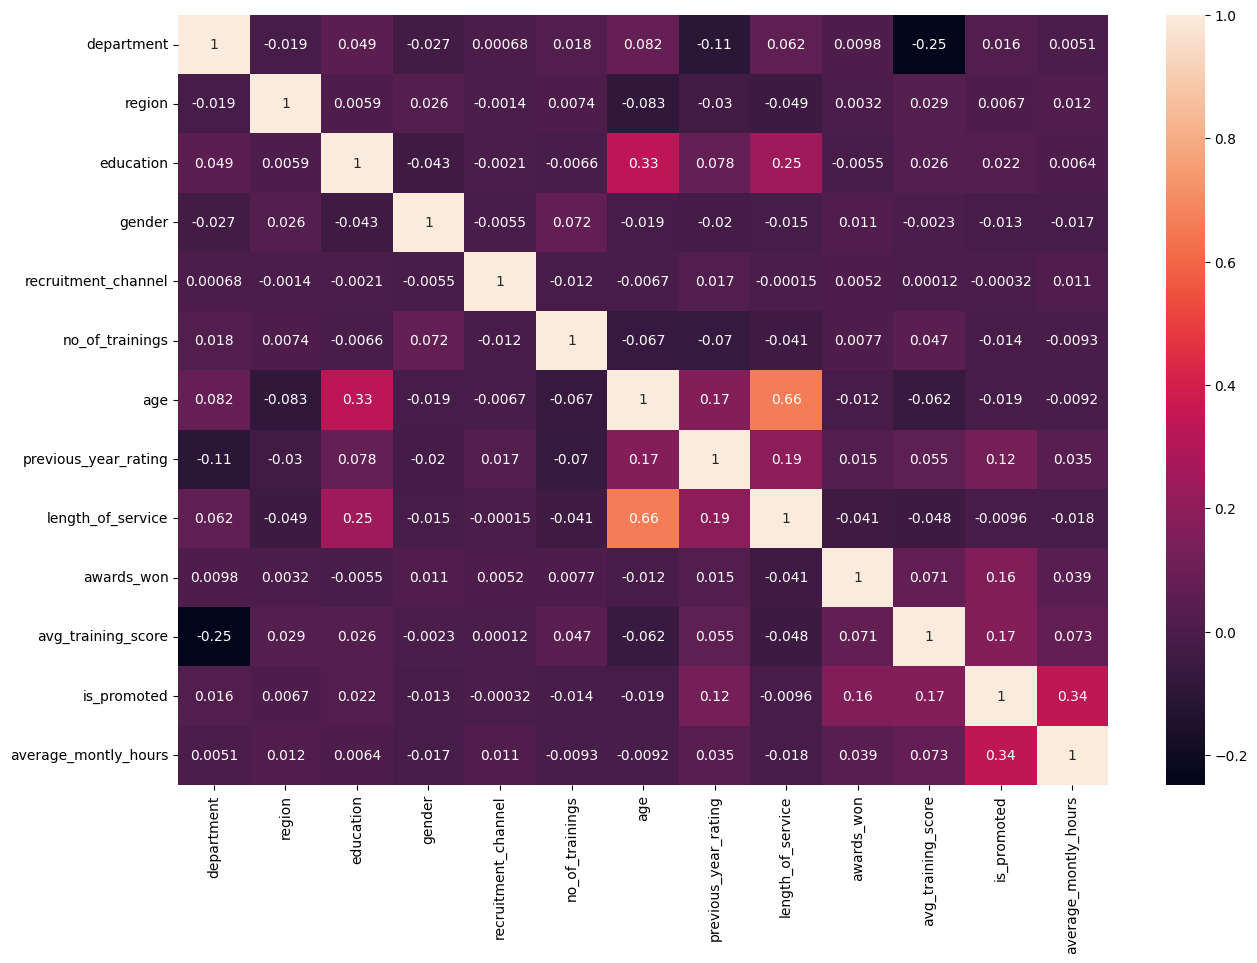

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

### Randomly Resampling 

#### Data is unbalanced, so we need to balance it. oversampling is done for this. Undersampling will cause data loss.

In [64]:
#Dividing dataset 
X = data.drop('is_promoted' ,  axis = 1)
y = data['is_promoted']

In [65]:
print(X.isna().sum())
print(y.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
average_montly_hours    0
dtype: int64
0


In [66]:
ovs = SMOTE()
X_ovs, y_ovs = ovs.fit_resample(X, y)

In [67]:
print(X_ovs.shape)
print(y_ovs.shape)

(19122, 12)
(19122,)


In [68]:
data_new = pd.concat([X_ovs , y_ovs] , axis = 1)

<Axes: ylabel='count'>

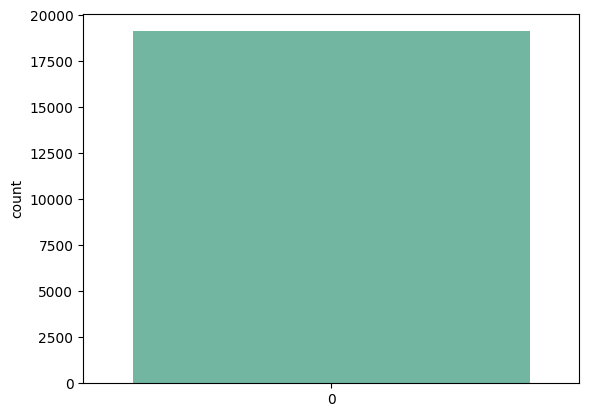

In [69]:
sns.countplot(data_new['is_promoted'])

In [70]:
data_new['is_promoted'].value_counts()

0    9561
1    9561
Name: is_promoted, dtype: int64

## Model Building

In [71]:
col=['department','region','education','gender','recruitment_channel']
le=LabelEncoder()
data[col] = data[col].apply(le.fit_transform)

In [72]:
#Dividing dataset 
X = data_new.drop('is_promoted' ,  axis = 1)
y = data_new['is_promoted']

In [73]:
# Balance the dataset using SMOTE
ovs = SMOTE(random_state=42)
X_ovs, y_ovs = ovs.fit_resample(X, y)

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_ovs,y_ovs ,test_size=0.2, random_state=42)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15297, 12)
(15297,)
(3825, 12)
(3825,)


## Logistic Regression

In [76]:
# Running the model on train data and validating on validation data

model_log = LogisticRegression()
model_log.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# for training data
y_pred_train = model_log.predict(X_train)
accuracy_logtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_logtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))


Accuracy score on train data: 74.8316663398052
F1 macro score on train data: 0.7482230263944968
classification_report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7627
           1       0.74      0.77      0.75      7670

    accuracy                           0.75     15297
   macro avg       0.75      0.75      0.75     15297
weighted avg       0.75      0.75      0.75     15297

confusion_matrix: 
 [[5576 2051]
 [1799 5871]]


In [78]:
# for test data 
y_pred_test = model_log.predict(X_test)
accuracy_logtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_logtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))


Accuracy score on test data: 75.42483660130719
F1 macro score on test data: 0.7542361203387913
classification_report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      1934
           1       0.75      0.76      0.75      1891

    accuracy                           0.75      3825
   macro avg       0.75      0.75      0.75      3825
weighted avg       0.75      0.75      0.75      3825

confusion_matrix: 
 [[1456  478]
 [ 462 1429]]


In [79]:
# # plotting confusion matrix
# plot_confusion_matrix(model_log, X_test,y_test,cmap=plt.cm.Blues)
# plt.show()

## Support Vector Machines

In [80]:
# Running the model on train data and validating on validation data
model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [81]:
# for training data
y_pred_train = model_svm.predict(X_train)
accuracy_svmtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_svmtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
# plot_confusion_matrix(model_svm, X_train,y_train,cmap=plt.cm.Blues); plt.show();

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score on train data: 49.85944956527424
F1 macro score on train data: 0.3327080788693073
classification_report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      7627
           1       0.00      0.00      0.00      7670

    accuracy                           0.50     15297
   macro avg       0.25      0.50      0.33     15297
weighted avg       0.25      0.50      0.33     15297

confusion_matrix: 
 [[7627    0]
 [7670    0]]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# for test data 
y_pred_test = model_svm.predict(X_test)
accuracy_svmtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_svmtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
# print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

Accuracy score on test data: 50.56209150326797
F1 macro score on test data: 0.33582219135266533
classification_report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67      1934
           1       0.00      0.00      0.00      1891

    accuracy                           0.51      3825
   macro avg       0.25      0.50      0.34      3825
weighted avg       0.26      0.51      0.34      3825



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [83]:
# plotting confusion matrix
# plot_confusion_matrix(model_svm, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Naive Bayes

In [84]:
# Running the model on train data and validating on validation data

model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [85]:
# for training data
y_pred_train = model_nb.predict(X_train)
accuracy_nbtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_nbtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
# plot_confusion_matrix(model_nb, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on train data: 76.53788324508074
F1 macro score on train data: 0.7652001383542157
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      7627
           1       0.75      0.79      0.77      7670

    accuracy                           0.77     15297
   macro avg       0.77      0.77      0.77     15297
weighted avg       0.77      0.77      0.77     15297

confusion_matrix: 
 [[5643 1984]
 [1605 6065]]


In [86]:
# for test data 
y_pred_test = model_nb.predict(X_test)
accuracy_nbtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_nbtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

Accuracy score on test data: 75.66013071895425
F1 macro score on test data: 0.7565917243339376
classification_report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      1934
           1       0.75      0.77      0.76      1891

    accuracy                           0.76      3825
   macro avg       0.76      0.76      0.76      3825
weighted avg       0.76      0.76      0.76      3825

confusion_matrix: 
 [[1435  499]
 [ 432 1459]]


## Xgboost

In [87]:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
# for training data
y_pred_train = model.predict(X_train)
accuracy_xgtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_xgtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
# plot_confusion_matrix(model_xg, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on train data: 96.43067268091782
F1 macro score on train data: 0.9643026736060832
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      7627
           1       0.98      0.95      0.96      7670

    accuracy                           0.96     15297
   macro avg       0.96      0.96      0.96     15297
weighted avg       0.96      0.96      0.96     15297

confusion_matrix: 
 [[7457  170]
 [ 376 7294]]


In [91]:
# for test data 
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.9396078431372549
F1 score: 0.9381857104629382
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1934
           1       0.95      0.93      0.94      1891

    accuracy                           0.94      3825
   macro avg       0.94      0.94      0.94      3825
weighted avg       0.94      0.94      0.94      3825

Confusion matrix:
 [[1841   93]
 [ 138 1753]]


## Save Model


In [90]:
import pickle

pickle.dump(model,open('HRmodel.pkl','wb'))